In [3]:
import matplotlib.pyplot as plt
import numpy as np

from main import *

def get_boxplot_lines(data:list) -> list:
    median = np.median(data)
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    upper_whisker = upper_quartile+(1.5*iqr)
    lower_whisker = lower_quartile-(1.5*iqr)

    upper_whisker = max([e for e in data if e < upper_whisker])
    lower_whisker = min([e for e in data if e > lower_whisker])

    return [upper_whisker, upper_quartile, median, lower_quartile, lower_whisker]

#### Selección de Dataset

In [4]:
dataset = "ls_orchid"
dataset = "usp_f"

In [5]:
sizes = read_list_from_file("data/sizes_" + dataset + ".txt")
sizes_ori = size_to_list("data/uniprot_sprot.fasta")


Calculating sizes


### Cantidad de aminoácidos por entrada

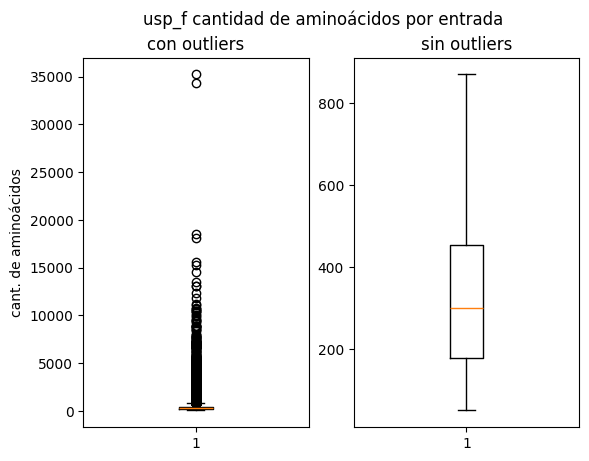

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(dataset + " cantidad de aminoácidos por entrada")

ax1.set_title("con outliers")
ax1.set_ylabel("cant. de aminoácidos")
ax1.boxplot(sizes)

ax2.set_title("sin outliers")
ax2.boxplot(sizes, 0, '')

plt.show()

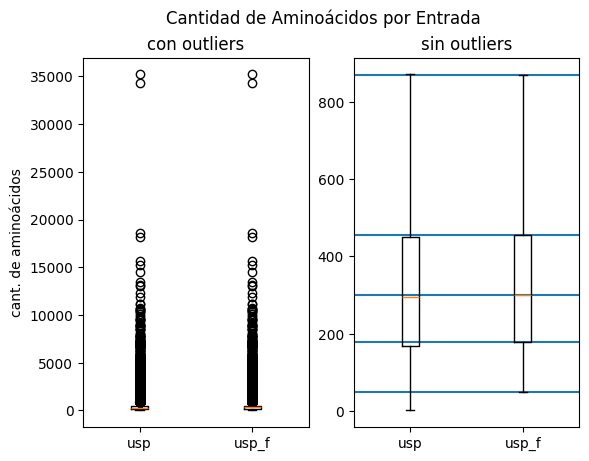

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Cantidad de Aminoácidos por Entrada")

extra_lines = get_boxplot_lines(sizes)
for l in extra_lines:
    ax2.axhline(l)

ax1.set_title("con outliers")
ax1.set_ylabel("cant. de aminoácidos")
ax1.boxplot([sizes_ori, sizes], labels = ["usp", "usp_f"])

ax2.set_title("sin outliers")
ax2.boxplot([sizes_ori, sizes], 0, '', labels = ["usp", "usp_f"])

plt.show()

### Ploteo de Boxplot para Datasets Random y Suffled
##### Carga de datos, seleccinar complejidad

In [6]:
#################################################

complexity = "Icalc"
#complexity = "Discrepancia"

#################################################

if   complexity == "Icalc":
    source = "results/icalc_" + dataset
elif complexity == "Discrepancia":
    source = "results/discr_" + dataset

original = read_list_from_file(source + ".txt")
shuffled_results = []
random_results = []

sizes = read_list_from_file("data/sizes_" + dataset + ".txt")

for i in range(1,11):
    shuffled_result = make_name(source + "_s", i, ".txt")
    random_result   = make_name(source + "_r", i, ".txt")

    shuffled_results.append(read_list_from_file(shuffled_result))
    random_results.append(read_list_from_file(random_result))

##### Seleccinar si plotear muestras random o shuffled

In [7]:
#################################################

r_or_s = "random"
#r_or_s = "shuffle"

#################################################

if   r_or_s == "shuffle":
    title = "Shuffled"
    results = shuffled_results
elif r_or_s == "random":
    title = "Random"
    results = random_results
labels = ["Original     ", "#01", "#02", "#03", "#04", "#05", "#06", "#07", "#08", "#09", "#10"]

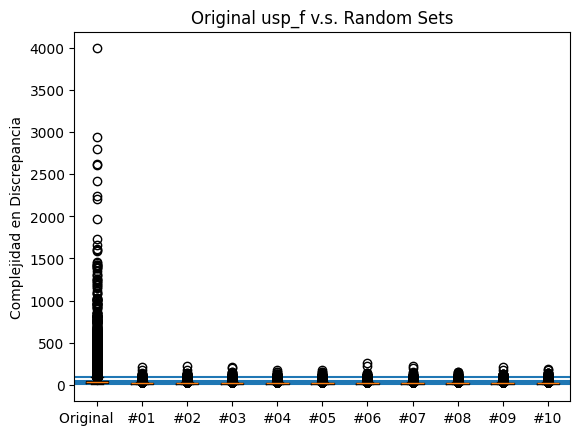

In [8]:
extra_lines = get_boxplot_lines(results[0])
for l in extra_lines:
    plt.axhline(l)

plt.boxplot(results, labels = labels)

plt.title("Original " + dataset + " v.s. " + title + " Sets")
plt.ylabel("Complejidad en " + complexity)
plt.show()

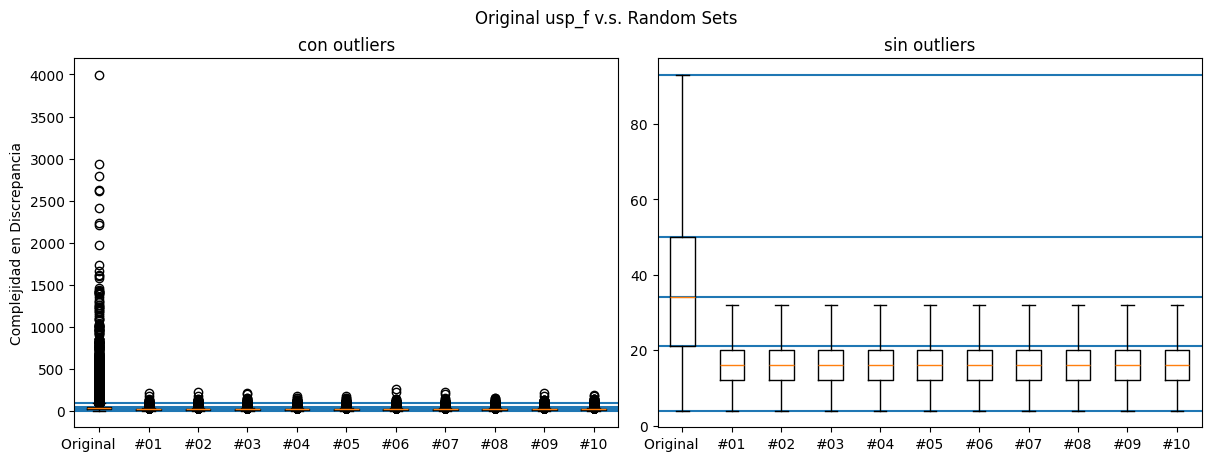

In [9]:
fig = plt.figure(figsize=(12, 4.5), layout='constrained')
(ax1, ax2) = fig.subplots(1, 2)
fig.suptitle("Original " + dataset + " v.s. " + title + " Sets")

extra_lines = get_boxplot_lines(results[0])
for l in extra_lines:
    ax1.axhline(l)
    ax2.axhline(l)

ax1.set_title("con outliers")
ax1.set_ylabel("Complejidad en " + complexity)
ax1.boxplot(results, labels = labels)

ax2.set_title("sin outliers")
ax2.boxplot(results, 0, '', labels = labels)

plt.show()